# Kaggle - Titanic - Survival prediction
## Reading train and test data

In [100]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set() # Plot style

import IPython
IPython.core.pylabtools.figsize(12, 4)

# Import models
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier

In [3]:
# Open CSV file for train data and test data
df_train = pd.read_csv('data/train.csv')
df_train.head()
#df_train.info()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
# Open CSV file for test data
df_test = pd.read_csv('data/test.csv')
df_test.head()
#df_test.info()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


## Exploration of the data

In [5]:
df_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
df_test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [7]:
df_train.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Graham, Mr. George Edward",male,CA. 2343,C23 C25 C27,S
freq,1,577,7,4,644


In [8]:
print 'Analysis of null in training dataset'
print '-----------------------------------'
print 'Passenger_id nulls: ' + str(df_train['PassengerId'].isnull().sum())
print 'Pclass nulls: ' + str(df_train['Pclass'].isnull().sum())
print 'Age nulls: ' + str(df_train['Age'].isnull().sum())
print 'SibSp nulls: ' + str(df_train['SibSp'].isnull().sum())
print 'Parch nulls: ' + str(df_train['Parch'].isnull().sum())
print 'Ticket nulls: ' + str(df_train['Ticket'].isnull().sum())
print 'Fare nulls: ' + str(df_train['Fare'].isnull().sum())
print 'Cabin nulls: ' + str(df_train['Cabin'].isnull().sum())
print 'Embarked nulls: ' + str(df_train['Embarked'].isnull().sum())
print '-----------------------------------'
nan_rows = df_train[df_train['Age'].isnull()]
nan_rows.loc[:,:].head()

# Most frequent value per column
print 'Mean/Median/Mode in training dataset per column'
print '-----------------------------------'
print 'Embarked:'
print df_train['Embarked'].value_counts()

print "Fare: Mean = %f , Median = %f , Mode = %f" % (df_train['Fare'].mean(),df_train['Fare'].median(),df_train['Fare'].mode())
#print "Fare: Mean = %f , Median = %f , Mode = %f" % (df_train['Ticket'].mean(),df_train['Ticket'].median(),df_train['Ticket'].mode())
print 'Ticket:'
print df_train['Ticket'].value_counts().head()
print "Age: Mean = %f , Median = %f , Mode = %f" % (df_train['Age'].mean(),df_train['Age'].median(),df_train['Age'].mode())

Analysis of null in training dataset
-----------------------------------
Passenger_id nulls: 0
Pclass nulls: 0
Age nulls: 177
SibSp nulls: 0
Parch nulls: 0
Ticket nulls: 0
Fare nulls: 0
Cabin nulls: 687
Embarked nulls: 2
-----------------------------------
Mean/Median/Mode in training dataset per column
-----------------------------------
Embarked:
S    644
C    168
Q     77
Name: Embarked, dtype: int64
Fare: Mean = 32.204208 , Median = 14.454200 , Mode = 8.050000
Ticket:
CA. 2343    7
347082      7
1601        7
347088      6
CA 2144     6
Name: Ticket, dtype: int64
Age: Mean = 29.699118 , Median = 28.000000 , Mode = 24.000000


#### Observations

* Min(Fare) is 0. This could mean that there are babies (for example) free of charge, or actually errors.
* We need to check the distribution of Fare prices, and decide whether making buckets or not.
* There are 2 nulls in 'Embarked'. Replace NaN by 'S', by far the most repeated value.
* Cabin nulls may mean people without a cabin, hence, there were less cabins than people.
* Ticket is alphanumeric
* We have five categorical variables: Sex, Embarked, Class, and Cabin

### Ratio of survival in training data

In [9]:
from __future__ import division

num_passengers_train = df_train.shape[0]
print 'Number of passengers: ' + str(num_passengers_train)

#num_passengers_survived_train = df_train.groupby('Survived').size()[1]
num_passengers_survived_train = df_train[df_train['Survived']==1].shape[0]
print 'Number of survivors: ' + str(num_passengers_survived_train)

ratio_survival = (num_passengers_survived_train/num_passengers_train)
print 'Survival ratio in training data = ' + str(round(ratio_survival*100,2)) + "%"

Number of passengers: 891
Number of survivors: 342
Survival ratio in training data = 38.38%


### Men vs women survival ratio

In [10]:
# Break by men and women
women_train = df_train[df_train['Sex']=='female']
men_train = df_train[df_train['Sex']=='male']

num_women_train = women_train.shape[0]
num_men_train = men_train.shape[0]
print 'Women on board: ' + str(num_women_train)
print 'Men on board: ' + str(num_men_train)

num_women_survived_train = women_train[women_train['Survived']==1].shape[0]
num_men_survived_train = men_train[men_train['Survived']==1].shape[0]


ratio_survival_women = (num_women_survived_train/num_women_train)
ratio_survival_men = (num_men_survived_train/num_men_train)

print 'Survival ratio for women in training data = ' + str(round(ratio_survival_women*100,2)) + "%"
print 'Survival ratio for men in training data = ' + str(round(ratio_survival_men*100,2)) + "%"

Women on board: 314
Men on board: 577
Survival ratio for women in training data = 74.2%
Survival ratio for men in training data = 18.89%


## Data Visualisation
* Constrast different subsets of variables to hint correlations

### Survived vs Pclass and Sex

[(0, 1.1)]

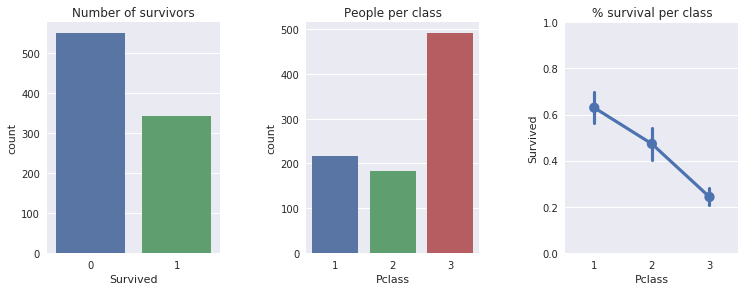

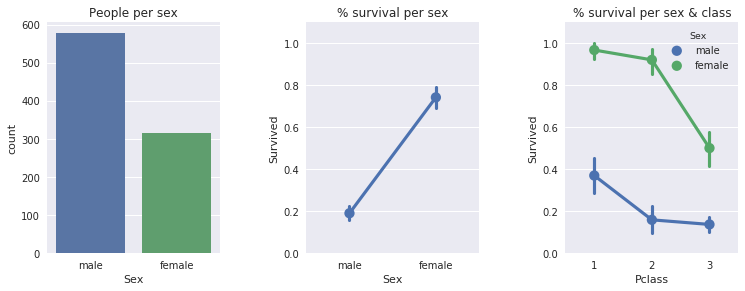

In [11]:
# First row
# Survivors and classes
fig, axs = plt.subplots(ncols=3)
plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=0.9, wspace=0.5, hspace=0.2)
fig_survived = sns.countplot('Survived', data=df_train, ax=axs[0])
fig_pclass = sns.countplot('Pclass', data=df_train, ax=axs[1])
fig_survived_per_class = sns.pointplot('Pclass', 'Survived', data=df_train, ax=axs[2])

fig_survived_per_class.set(ylim=(0,1))
fig_survived.set_title('Number of survivors')
fig_pclass.set_title('People per class') 
fig_survived_per_class.set_title('% survival per class')

# Second row
# Proportion of survivors per class and sex
fig, axs = plt.subplots(ncols=3)
plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=0.9, wspace=0.5, hspace=0.2)
fig_sex = sns.countplot('Sex', data=df_train, ax=axs[0])
fig_survived_by_sex = sns.pointplot('Sex', 'Survived', data=df_train, ax=axs[1])
fig_survived_by_sex_class = sns.pointplot('Pclass', 'Survived', data=df_train, hue='Sex', ax=axs[2])

fig_sex.set_title('People per sex')
fig_survived_by_sex.set_title('% survival per sex')
fig_survived_by_sex.set(ylim=(0, 1.1))
fig_survived_by_sex_class.set_title('% survival per sex & class')
fig_survived_by_sex_class.set(ylim=(0, 1.1))

#### Observations
* The lower the class (3 is worst class than 1), the less the ratio of survival
* Females have an incredible ratio of survival compare to male
* "Women and children first" seems to be true. Check later the age to verify
* Both Sex and Class seems very important for the survival ratio

#### Actions


### Survived vs embarkation point, class and sex

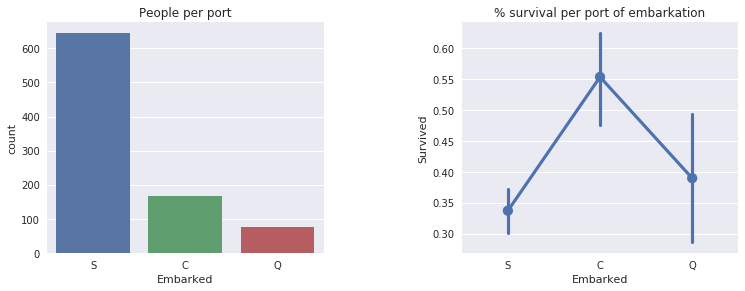

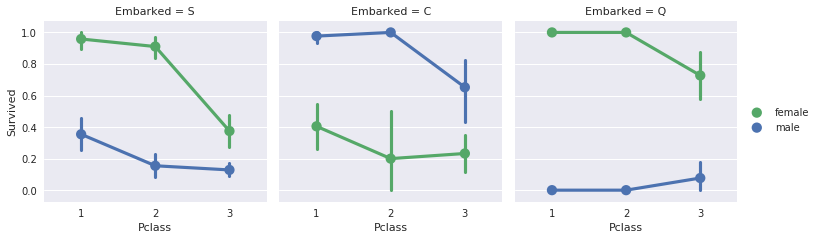

In [12]:
# Third row
# Proportion of survivors per embarked. Class per embark point
fig, axs = plt.subplots(ncols=2)
plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=0.9, wspace=0.5, hspace=0.2)
fig_embarked = sns.countplot('Embarked', data=df_train, ax=axs[0])
fig_survived_by_embarked = sns.pointplot('Embarked', 'Survived', data=df_train, ax=axs[1])

fig_embarked.set_title('People per port')
fig_survived_by_embarked.set_title('% survival per port of embarkation')

# Fourth row
grid = sns.FacetGrid(df_train, col='Embarked', size=3.5, aspect=1)
grid.map(sns.pointplot, 'Pclass', 'Survived', 'Sex', palette='deep')
grid.add_legend()

#### Observations
* The embarkation port seems to influence, specially in port C 
* Note that 'Male' survival is almost 100% for those who embarked from C, while female is signicantly lower!
* Very low rate of survivals from port Q
* Question: embarkation point could determine the cabin, and the location of the cabin in the Titanic could have been essential, depending on the point of impact with the iceberg
#### Actions

### Survived vs Age

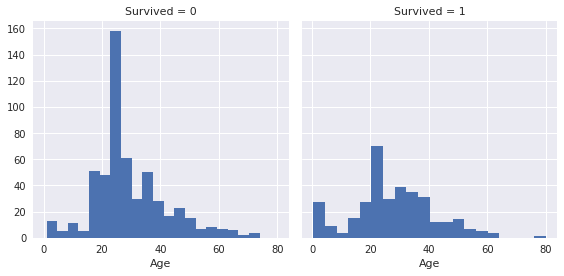

In [35]:
# Distribution of survived and dead by age
g = sns.FacetGrid(df_train, col='Survived', size=4, aspect=1)
g.map(plt.hist, 'Age', bins=20)

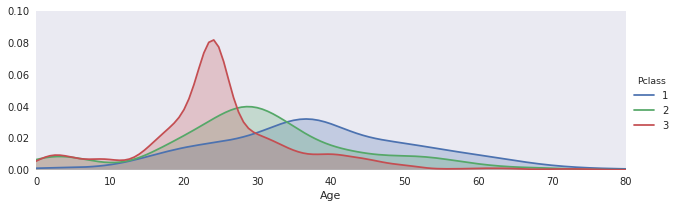

Median of Age for all classes: 26.0 years
Median of Age for class 1: 37.0 years
Median of Age for class 2: 29.0 years
Median of Age for class 3: 24.0 years


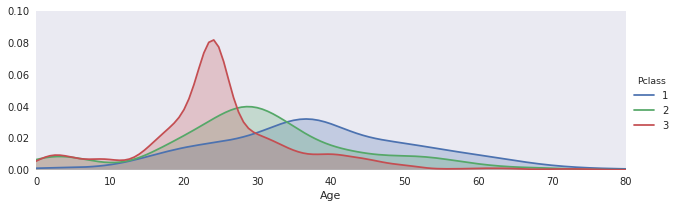

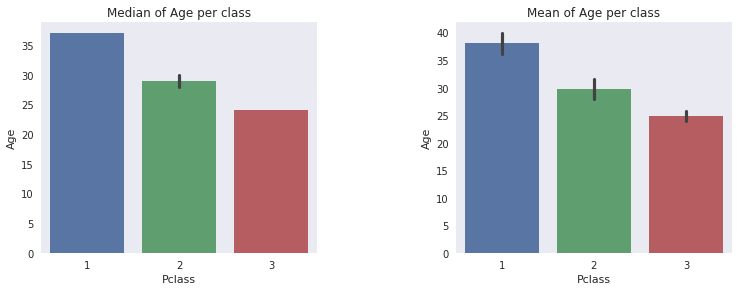

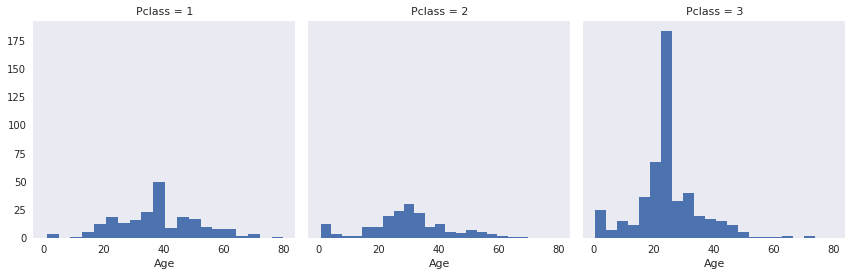

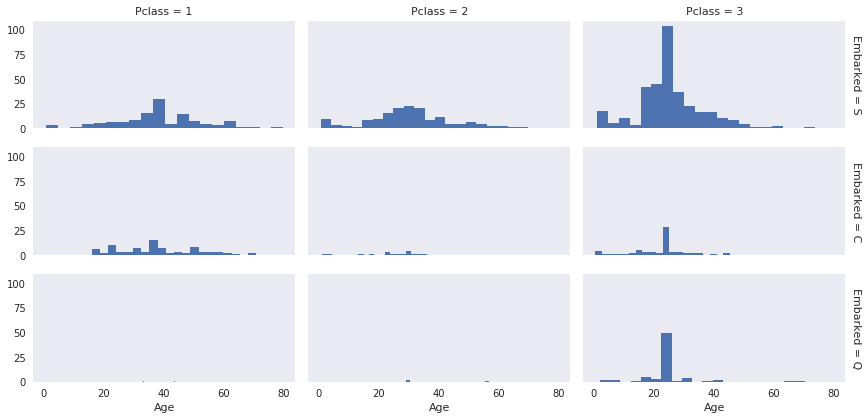

In [52]:
# TODO: 
#fig = sns.FacetGrid(df_train, hue='Pclass', size=3, aspect=3)
#fig.map(sns.kdeplot, 'Fare', shade=True, legend=True)
#fig.set(xlim=(0, 80));
#fig.set(ylim=(0, 0.1));
#fig.add_legend()

# Distribution of age by class
fig = sns.FacetGrid(df_train, hue='Pclass', size=3, aspect=3)
fig.map(sns.kdeplot, 'Age', shade=True)
fig.set(xlim=(0, 80));
fig.set(ylim=(0, 0.1));
fig.add_legend()

# Median of Age per class
fig, axs = plt.subplots(ncols=2)
plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=0.9, wspace=0.5, hspace=0.2)
fig_median_age_class = sns.barplot(data=df_train, x='Pclass', y='Age', estimator=np.median, ax=axs[0])
fig_mean_age_class = sns.barplot(data=df_train, x='Pclass', y='Age', estimator=np.mean, ax=axs[1])

fig_median_age_class.set_title('Median of Age per class')
fig_mean_age_class.set_title('Mean of Age per class')

print 'Median of Age for all classes: ' + str(df_train['Age'].median()) + ' years'
print 'Median of Age for class 1: ' + str(df_train[df_train['Pclass']==1]['Age'].median()) + ' years'
print 'Median of Age for class 2: ' + str(df_train[df_train['Pclass']==2]['Age'].median()) + ' years'
print 'Median of Age for class 3: ' + str(df_train[df_train['Pclass']==3]['Age'].median()) + ' years'

df_train[(df_train['Pclass']==3) & (df_train['Embarked']=='S')]
g = sns.FacetGrid(df_train, col='Pclass', size=4, aspect=1)
g.map(plt.hist, 'Age', bins = 20)

#g = sns.FacetGrid(df_train, col='Embarked', size=4, aspect=1)
#g.map(plt.hist, 'Age', bins = 20)

# Age by class and embarkation point
g = sns.FacetGrid(df_train, row='Embarked', col='Pclass', size=2, aspect=2, margin_titles=True)
g.map(plt.hist, 'Age', bins = 20)


In [15]:
# How many were not adults?
print 'How many kids in the titanic (<16): ' + str(len(df_train[df_train['Age']<16]))

How many kids in the titanic (<16): 83


#### Observations
* There are a few children (<16). This could affect the survival ratio
* Create buckets/bins for Age could be benefitial
* Median/mean of age differs depending on the class. It makes senses, the older people would be wealthier
#### Actions
* Create a new variable 'Person' to distinguish between Woman, Man, and Child
* Try creating a new variable 'Age_range' with 5-6 intervals
* Fill NaN values in Age by taking the median per class (Consider embarkation point as well?)

### Cabin vs Survived
* Understanding of Cabin codes, and how this could have affected the survival ratio (Titanic's sink was at night)

### Survived vs Fare

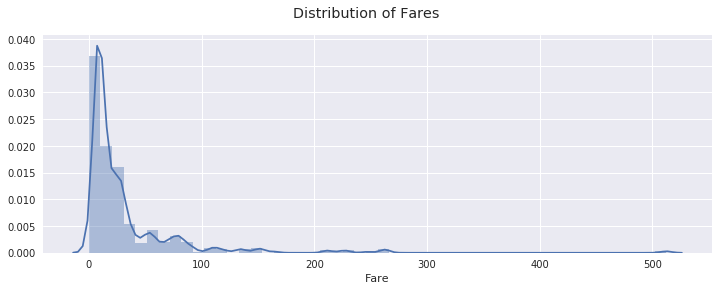

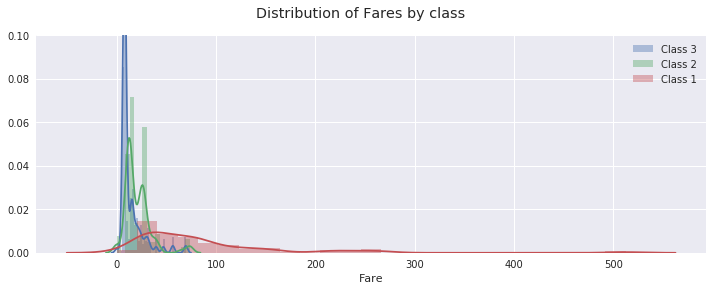

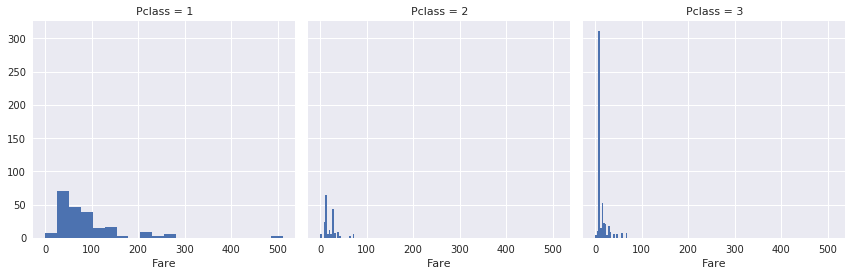

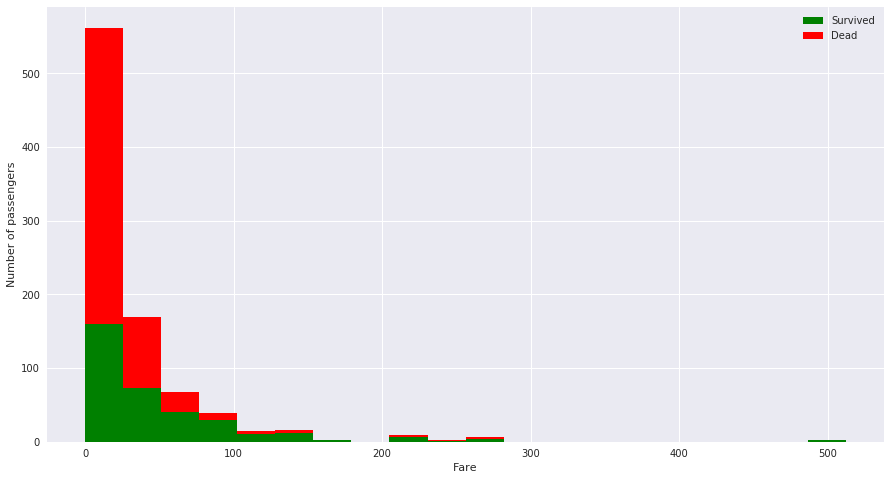

In [16]:
# Distribution of Fare
sns.distplot(df_train['Fare'].dropna(), kde=True, rug=False)
plt.suptitle('Distribution of Fares')
#sns.distplot(df_train['Pclass'=='1'], kde=True, rug=False)

fig, ax = plt.subplots()
fig.suptitle('Distribution of Fares by class')
sns.distplot(df_train[df_train['Pclass']==3]['Fare'], kde=True, rug=False, ax=ax, label="Class 3")
sns.distplot(df_train[df_train['Pclass']==2]['Fare'], kde=True, rug=False, ax=ax, label="Class 2")
sns.distplot(df_train[df_train['Pclass']==1]['Fare'], kde=True, rug=False, ax=ax, label="Class 1")
plt.legend()

axes = plt.gca()
axes.set_ylim([0,0.10])
g = sns.FacetGrid(df_train, col='Pclass', size=4, aspect=1)
g.map(plt.hist, 'Fare', bins = 20)


#g = sns.FacetGrid(df_train, col='Survived', size=4, aspect=1)
#g.map(plt.hist, 'Fare', bins=20)

figure = plt.figure(figsize=(15,8))
plt.hist([df_train[df_train['Survived']==1]['Fare'],df_train[df_train['Survived']==0]['Fare']], 
         stacked=True, color = ['g','r'],
         bins = 20,label = ['Survived','Dead'])
plt.xlabel('Fare')
plt.ylabel('Number of passengers')
plt.legend()

#### Observations
* Most of the people pay less than 40 for the ticket
* The more someone paid, the better survival ratio. Those who paid more than 100, almost guaranteed their survival

#### Actions

## Feature engineering (I)
* Check if there are NaN values in certain columns, such as Embarked, and replace them by other values
* **TODO**: MAKE REPLACEMENTS FOR BOTH DATASETS

**Embarked**: Replace NaN in embarked by 'S', by far the most repeated value.

In [17]:
df_train['Embarked'] = df_train['Embarked'].fillna('S')
print 'Embarked nulls in train: ' + str(df_train['Embarked'].isnull().sum())

df_test['Embarked'] = df_test['Embarked'].fillna('S')
print 'Embarked nulls in test: ' + str(df_test['Embarked'].isnull().sum())

Embarked nulls in train: 0
Embarked nulls in test: 0


**Age**: Replace NaN by median depending on the class

In [18]:
median_age_class1 = df_train[df_train['Pclass']==1]['Age'].median()
median_age_class2 = df_train[df_train['Pclass']==2]['Age'].median()
median_age_class3 = df_train[df_train['Pclass']==3]['Age'].median()

median_age_class1_test = df_test[df_test['Pclass']==1]['Age'].median()
median_age_class2_test = df_test[df_test['Pclass']==2]['Age'].median()
median_age_class3_test = df_test[df_test['Pclass']==3]['Age'].median()

df_train[df_train['Pclass']==1] = df_train[df_train['Pclass']==1].fillna(median_age_class1)
df_train[df_train['Pclass']==2] = df_train[df_train['Pclass']==2].fillna(median_age_class2)
df_train[df_train['Pclass']==3] = df_train[df_train['Pclass']==3].fillna(median_age_class3)

df_test[df_test['Pclass']==1] = df_test[df_test['Pclass']==1].fillna(median_age_class1)
df_test[df_test['Pclass']==2] = df_test[df_test['Pclass']==2].fillna(median_age_class2)
df_test[df_test['Pclass']==3] = df_test[df_test['Pclass']==3].fillna(median_age_class3)

## Prediction models (I) - With no further optimisations

In [19]:
# Replace categorical variables (Sex, Embarked, Pclass) by dummy variables
dummy_sex = pd.get_dummies(df_train['Sex'], prefix='Sex')
dummy_embarked = pd.get_dummies(df_train['Embarked'], prefix='Embarked')
dummy_pclass = pd.get_dummies(df_train['Pclass'], prefix='Pclass')

# Create a clean data frame for the regression
cols_to_keep = ['Age', 'SibSp', 'Parch', 'Fare']
X_train = df_train[cols_to_keep].join(dummy_sex).join(dummy_embarked).join(dummy_pclass)
X_train

Y_train = df_train['Survived']

# Prepare test dataset
# Replace categorical variables (Sex, Embarked, Pclass) by dummy variables
dummy_sex = pd.get_dummies(df_test['Sex'], prefix='Sex')
dummy_embarked = pd.get_dummies(df_test['Embarked'], prefix='Embarked')
dummy_pclass = pd.get_dummies(df_test['Pclass'], prefix='Pclass')
X_test = df_test[cols_to_keep].join(dummy_sex).join(dummy_embarked).join(dummy_pclass)
#X_test

In [105]:
'''
Score a particular model
'''
from sklearn.cross_validation import cross_val_score
def compute_model_score(model, X_train, Y_train, X_test):
    model.fit(X_train,Y_train)
    Y_pred = model.predict(X_test)
    score = model.score(X_train,Y_train)
    return score, Y_pred
'''
Score a particular model using k-fold cross validation
'''
def compute_model_score_cv(model, X_train, Y_train, X_test):
    fit = model.fit(X_train,Y_train)
    Y_pred = model.predict(X_test)
    x_val = cross_val_score(fit, X_train, Y_train, cv =5, scoring='accuracy')
    return np.mean(x_val), Y_pred

0.808080808081
0.796928597798


In [202]:
# Build a table with scores for different models 
model_list = [{'function': LogisticRegression(), 'name': 'LR'},
              {'function': SVC(), 'name': 'SVC'},
              {'function': KNeighborsClassifier(n_neighbors = 3), 'name': 'KN-3'},
              {'function': DecisionTreeClassifier(), 'name': 'DT'},
              {'function': GaussianNB(), 'name': 'GNB'},
              {'function': Perceptron(), 'name': 'Perceptron'},
              {'function': SGDClassifier(), 'name': 'SGD'},
              {'function': RandomForestClassifier(n_estimators=100), 'name': 'Random Forest'}             
             ]

model_results = []

for model in model_list:
    score, Y_pred = compute_model_score(model['function'], X_train, Y_train, X_test)
    score_cv, Y_pred = compute_model_score_cv(model['function'], X_train, Y_train, X_test)
    model_results.append([model['name'], score, score_cv, Y_pred])

In [204]:
# Show results obtained sorted by score
df_model_results = pd.DataFrame (model_results, columns=('Model', 'Score', 'Score-CV', 'Prediction'))  
df_model_results.sort_values(by='Score-CV', ascending=False)

,Model,Score,Score-CV,Prediction
7,Random Forest,0.982043,0.809269,"[0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, ..."
0,LR,0.808081,0.796929,"[0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, ..."
4,GNB,0.785634,0.783476,"[0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, ..."
3,DT,0.982043,0.776722,"[0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, ..."
2,KN-3,0.841751,0.716122,"[0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, ..."
1,SVC,0.890011,0.713951,"[0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, ..."
5,Perceptron,0.657688,0.661293,"[0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, ..."
6,SGD,0.683502,0.633359,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, ..."


In [206]:
score_cv, Y_pred = compute_model_score_cv(RandomForestClassifier(n_estimators=100), X_train, Y_train, X_test)
print score_cv

0.810411602011


#### Write result in a csv

In [207]:
# Choose model and save its prediction
#print df_model_results.loc[7]
#Y_pred = df_model_results.loc[7]['Prediction']
#print Y_pred

submission = pd.DataFrame({
        "PassengerId": df_test["PassengerId"],
        "Survived": Y_pred   
})  
 
submission.to_csv('submission.csv', index=False)

## Feature Engineering (II)
* Apply domain knowledge to see if we can improve the initial results

### Embarked processing

### Fare processing

In [ ]:
# Checking fare errors or free tickets
df_train[['Pclass','Age','Fare']][df_train['Fare']<5]

It seems that there are errors in the Fare. Change these values for the median of their class

### Age processing
* Replace NaN values for the mean/median corresponding to their class
* Possibly create another variables for child (<16) 

In [ ]:
def person(passenger):
    age, sex = passenger
    if age < 16:
        return "child"
    else:
        return dict(male="man", female="woman")[sex]

# Create 5 intervals for age
#pd.cut(df_train['Age'], 5)

# Create a new colum    
df_train['Person'] = df_train[['Age','Sex']].apply(person, axis=1)
    
# Survived by Adults and kids (and sex)
#fig_survived_by_age = sns.pointplot('Age', 'Survived', data=df_train)
fig, axs = plt.subplots(ncols=2)
plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=0.9, wspace=0.5, hspace=0.2)
fig_person = sns.countplot('Person', data=df_train, ax=axs[0])
fig_survived_by_person = sns.pointplot('Person', 'Survived', data=df_train, ax=axs[1])

fig_person.set_title('Distribution by Adults or Kids')
fig_survived_by_person.set_title('% survival of Man, Woman and Child')
fig_survived_by_person.set(ylim=(0, 1.1))

In [ ]:
# Solve NaN in Age before plotting this
figure = plt.figure(figsize=(15,8))
plt.hist([df_train[df_train['Survived']==1]['Age'],df_train[df_train['Survived']==0]['Age']], 
         stacked=True, color = ['g','r'],
         bins = 20,label = ['Survived','Dead'])
plt.xlabel('Age')
plt.ylabel('Number of passengers')
plt.legend()

### SibSp and Parch processing
* SibSp (Number of Siblings/Spouses Aboard) and Parch (Number of Parents/Children Aboard) could be merged into one feature: 'family aboard'
* Create variable 'Alone' (or without family), as derivate of SibSp and Parch

# Prediction models

** TODO ** Make graph to see the importance of each variable for a model

## Logistic regression

In [27]:
LR_model = LogisticRegression()

LR_model.fit(X_train, Y_train)

#Y_pred = logreg.predict(X_test)

#logreg.score(X_train, Y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

## Simple model (Pclass, Gender, and Fare)
* As Fare is not discrete, create buckets for these feature

In [ ]:
# Open CSV file for test data
test_data = open('data/test.csv', 'rb')
test_data_csv = csv.reader(test_data)
header = test_data_csv.next()

# Prepare file for predition based on gender ONLY
prediction_file = open("gender_based_model.csv", "wb")
prediction_file_csv = csv.writer(prediction_file)
prediction_file_csv.writerow(["PassengerId", "Survived"]) # write the column headers